In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/synthetic_sensor_data_with_rul.csv')
data = data.drop(['timestamp'], axis=1)

In [ ]:
X = data.drop(['rul'], axis=1).values
y = data['rul'].values.reshape(-1, 1)

feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

X = feature_scaler.fit_transform(X)
y = target_scaler.fit_transform(y)

def create_sequences(data, target, seq_length=10):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i + seq_length])
        y_seq.append(target[i + seq_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - loss: 0.0881 - val_loss: 0.0825
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - loss: 0.0841 - val_loss: 0.0824
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - loss: 0.0834 - val_loss: 0.0826
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - loss: 0.0839 - val_loss: 0.0826
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 30s 12ms/step - loss: 0.0836 - val_loss: 0.0827
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - loss: 0.0837 - val_loss: 0.0826
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - loss: 0.0836 - val_loss: 0.0824
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - loss: 0.0839 - val_loss: 0.0824
Epoch 9/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - loss: 0.0838 - val_loss: 0.0824
Epoch 10/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - loss: 0.0837 - val_loss: 0.0824


625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0823


Test Loss: 0.08244835585355759


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


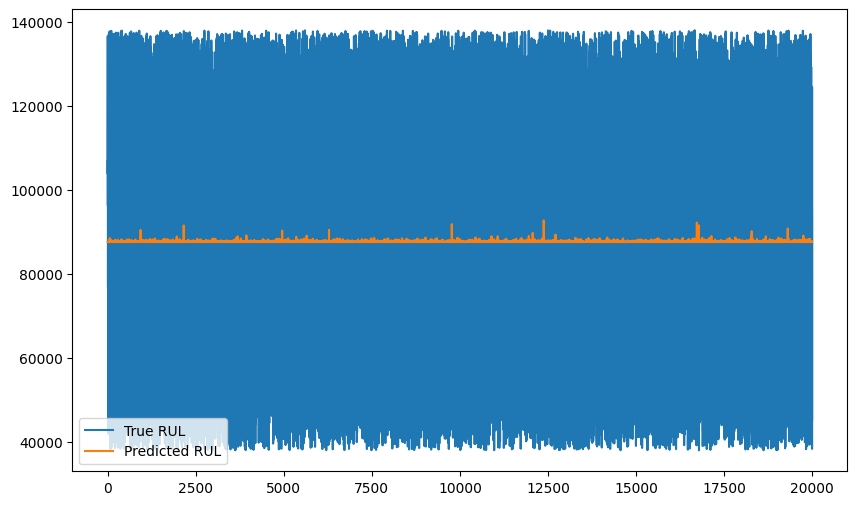

In [ ]:
loss = model.evaluate(X_test, y_test, verbose=1)
print("\n")
print(f'Test Loss: {loss}')
print("\n")

y_pred = model.predict(X_test)

y_pred_rescaled = target_scaler.inverse_transform(y_pred)
y_test_rescaled = target_scaler.inverse_transform(y_test)


plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='True RUL')
plt.plot(y_pred_rescaled, label='Predicted RUL')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss (MSE): {loss}')

y_pred = model.predict(X_test)
y_pred_rescaled = target_scaler.inverse_transform(y_pred)
y_test_rescaled = target_scaler.inverse_transform(y_test)

mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0823
Test Loss (MSE): 0.08244835585355759
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras_tuner import RandomSearch
import tensorflow as tf

# Load and preprocess data
data = pd.read_csv("synthetic_sensor_data_with_rul.csv")

# Separate features and target
X = data.drop(['rul'], axis=1).values
y = data['rul'].values.reshape(-1, 1)

# Scale features and target
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

X = feature_scaler.fit_transform(X)
y = target_scaler.fit_transform(y)

# Create sequences
def create_sequences(data, target, seq_length=10):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i + seq_length])
        y_seq.append(target[i + seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 10
X_seq, y_seq = create_sequences(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()

    # First LSTM layer
    model.add(
        LSTM(
            units=hp.Int('units_1', min_value=32, max_value=256, step=32),
            activation='relu',
            input_shape=(X_train.shape[1], X_train.shape[2]),
            return_sequences=True
        )
    )
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    # Second LSTM layer
    model.add(
        LSTM(
            units=hp.Int('units_2', min_value=16, max_value=128, step=16),
            activation='relu',
            return_sequences=False
        )
    )
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    # Dense output layer
    model.add(Dense(1))

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='mse'
    )
    return model

# Initialize Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='tuning_dir',
    project_name='rul_tuning'
)

# Run the tuner
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32, verbose=1)

# Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"Best Hyperparameters:")
print(f" - Units Layer 1: {best_hps.get('units_1')}")
print(f" - Dropout Layer 1: {best_hps.get('dropout_1')}")
print(f" - Units Layer 2: {best_hps.get('units_2')}")
print(f" - Dropout Layer 2: {best_hps.get('dropout_2')}")
print(f" - Learning Rate: {best_hps.get('learning_rate')}")

# Train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    epochs=50,  # You can increase this for better performance
    validation_data=(X_test, y_test),
    batch_size=32,
    verbose=1
)

# Evaluate the model
y_pred = best_model.predict(X_test)
y_pred_original = target_scaler.inverse_transform(y_pred)
y_test_original = target_scaler.inverse_transform(y_test)

# Calculate R² Score
r2 = r2_score(y_test_original, y_pred_original)
print(f"R² Score: {r2}")


ValueError: could not convert string to float: '2022-03-13 23:04:27.018491'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras_tuner import RandomSearch
import tensorflow as tf

# Load data
def load_data(file_path):
    data = pd.read_csv(file_path)

    # Check for non-numeric columns
    print(data.dtypes)

    # Convert timestamp column (if exists) to Unix timestamp or drop it
    if 'timestamp' in data.columns:  # Replace 'timestamp' with actual column name
        data['timestamp'] = pd.to_datetime(data['timestamp']).astype(np.int64) // 10**9  # Unix timestamp

    # If there are categorical columns, you can encode them or drop them
    data = pd.get_dummies(data, drop_first=True)  # One-hot encode categorical columns (if any)

    # Separate features and target
    X = data.drop(['rul'], axis=1).values
    y = data['rul'].values.reshape(-1, 1)

    return X, y


# Normalization pipeline
def normalize_data(X, y):
    feature_scaler = MinMaxScaler()
    target_scaler = MinMaxScaler()
    X_norm = feature_scaler.fit_transform(X)
    y_norm = target_scaler.fit_transform(y)
    return X_norm, y_norm, feature_scaler, target_scaler

# Standardization pipeline
def standardize_data(X, y):
    feature_scaler = StandardScaler()
    target_scaler = StandardScaler()
    X_std = feature_scaler.fit_transform(X)
    y_std = target_scaler.fit_transform(y)
    return X_std, y_std, feature_scaler, target_scaler

# Create sequences for LSTM
def create_sequences(data, target, seq_length=10):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i + seq_length])
        y_seq.append(target[i + seq_length])
    return np.array(X_seq), np.array(y_seq)

# Model building function
def build_model(hp):
    model = Sequential()

    # First LSTM layer
    model.add(
        LSTM(
            units=hp.Int('units_1', min_value=32, max_value=256, step=32),
            activation='relu',
            input_shape=(X_train.shape[1], X_train.shape[2]),
            return_sequences=True
        )
    )
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    # Second LSTM layer
    model.add(
        LSTM(
            units=hp.Int('units_2', min_value=16, max_value=128, step=16),
            activation='relu',
            return_sequences=False
        )
    )
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    # Dense output layer
    model.add(Dense(1))

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='mse'
    )
    return model

# Train and evaluate model
def train_and_evaluate(X, y, scaler_name):
    # Create sequences
    seq_length = 10
    X_seq, y_seq = create_sequences(X, y)

    # Train-test split
    global X_train, X_test, y_train, y_test  # Used in the build_model function
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    # Initialize Keras Tuner
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='tuning_dir',
        project_name=f'rul_tuning_{scaler_name}'
    )

    # Run the tuner
    tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32, verbose=1)

    # Get the best model
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    print(f"Best Hyperparameters for {scaler_name}:")
    print(f" - Units Layer 1: {best_hps.get('units_1')}")
    print(f" - Dropout Layer 1: {best_hps.get('dropout_1')}")
    print(f" - Units Layer 2: {best_hps.get('units_2')}")
    print(f" - Dropout Layer 2: {best_hps.get('dropout_2')}")
    print(f" - Learning Rate: {best_hps.get('learning_rate')}")

    # Train the best model
    best_model = tuner.hypermodel.build(best_hps)
    history = best_model.fit(
        X_train, y_train,
        epochs=50,  # Increase for better performance
        validation_data=(X_test, y_test),
        batch_size=32,
        verbose=1
    )

    # Evaluate the model
    y_pred = best_model.predict(X_test)
    y_pred_original = target_scaler.inverse_transform(y_pred)
    y_test_original = target_scaler.inverse_transform(y_test)

    # Calculate R² Score
    r2 = r2_score(y_test_original, y_pred_original)
    print(f"R² Score with {scaler_name}: {r2}")
    return r2

# Main pipeline
if __name__ == "__main__":
    # Load data
    X, y = load_data("synthetic_sensor_data_with_rul.csv")

    # Normalize data
    X_norm, y_norm, norm_feature_scaler, norm_target_scaler = normalize_data(X, y)
    print("Running with Normalization...")
    r2_normalization = train_and_evaluate(X_norm, y_norm, "Normalization")

    # Standardize data
    X_std, y_std, std_feature_scaler, std_target_scaler = standardize_data(X, y)
    print("Running with Standardization...")
    r2_standardization = train_and_evaluate(X_std, y_std, "Standardization")


Trial 5 Complete [00h 21m 12s]
val_loss: 4.385790089145303e-05

Best val_loss So Far: 1.4049067431187723e-05
Total elapsed time: 01h 26m 29s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
96                |192               |units_1
0.1               |0.1               |dropout_1
32                |96                |units_2
0.5               |0.3               |dropout_2
0.0005382         |0.0012226         |learning_rate

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - loss: 0.0252 - val_loss: 0.0013
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - loss: 0.0058 - val_loss: 3.4113e-04
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - loss: 0.0057 - val_loss: 6.2998e-04
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - loss: 0.0057 - val_loss: 3.1507e-04
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - loss: 0.0056 - val_loss: 3.0416e-04
Epoch 6/10
 193/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - loss: 0.0058

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf

In [ ]:
data = pd.read_csv("/content/synthetic_sensor_data_with_rul.csv")
data.head()
data = data.drop(['timestamp'], axis=1)

In [ ]:
X = data.drop(['rul'], axis=1).values
y = data['rul'].values.reshape(-1, 1)

print(X[:2])
print(y[:2])

feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

X = feature_scaler.fit_transform(X)
y = target_scaler.fit_transform(y)

print(X[:2])
print(y[:2])

[[4.74835708e+01 1.70611892e+03 1.51236814e+00]
 [4.43086785e+01 1.26892905e+03 1.18115434e+00]]
[[138005.34905286]
 [138004.34905286]]
[[0.55477821 0.60480552 0.69217561]
 [0.48378876 0.36018703 0.50035114]]
[[1.     ]
 [0.99999]]


In [ ]:
def create_sequences(data, target, seq_length=10):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i + seq_length])
        y_seq.append(target[i + seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 30
X_seq, y_seq = create_sequences(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

parameter_configs = [{"units_1": 128, "dropout_1": 0.2, "units_2": 64, "dropout_2": 0.2, "learning_rate": 1e-3},{"units_1": 64, "dropout_1": 0.3, "units_2": 32, "dropout_2": 0.3, "learning_rate": 5e-4},{"units_1": 256, "dropout_1": 0.1, "units_2": 128, "dropout_2": 0.1, "learning_rate": 1e-4},]
results = []

for idx, config in enumerate(parameter_configs):
    model = Sequential()
    model.add(LSTM(units=config["units_1"],activation="relu",input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True,))
    model.add(Dropout(config["dropout_1"]))
    model.add(LSTM(units=config["units_2"],activation="relu",return_sequences=False,))
    model.add(Dropout(config["dropout_2"]))
    model.add(Dense(1))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config["learning_rate"]),loss="mse")

    print(f"Training model {idx + 1} with parameters: {config}")
    history = model.fit(X_train,y_train,epochs=30, validation_data=(X_test, y_test),batch_size=32,verbose=1,)
    y_pred = model.predict(X_test)
    y_pred_original = target_scaler.inverse_transform(y_pred)
    y_test_original = target_scaler.inverse_transform(y_test)

    r2 = r2_score(y_test_original, y_pred_original)
    results.append({"config": config, "r2": r2, "model": model, "history": history})
    print(f"Model {idx + 1} R² Score: {r2}")

best_result = max(results, key=lambda x: x["r2"])
print("Best configuration:")
print(best_result["config"])
print(f"Best R² Score: {best_result['r2']}")

y_pred = best_result["model"].predict(X_test)
y_pred_original = target_scaler.inverse_transform(y_pred)

Training model 1 with parameters: {'units_1': 128, 'dropout_1': 0.2, 'units_2': 64, 'dropout_2': 0.2, 'learning_rate': 0.001}
Epoch 1/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 62s 23ms/step - loss: 0.0921 - val_loss: 0.0831
Epoch 2/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - loss: 0.0842 - val_loss: 0.0827
Epoch 3/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - loss: 0.0839 - val_loss: 0.0826
Epoch 4/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - loss: 0.0834 - val_loss: 0.0825
Epoch 5/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - loss: 0.0836 - val_loss: 0.0826
Epoch 6/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - loss: 0.0835 - val_loss: 0.0824
Epoch 7/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - loss: 0.0836 - val_loss: 0.0824
Epoch 8/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - loss: 0.0835 - val_loss: 0.0824
Epoch 9/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - loss: 0.0838 - val_loss: 0.0824
Epoch 10/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - loss:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - loss: 0.0998 - val_loss: 0.0826
Epoch 2/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - loss: 0.0853 - val_loss: 0.0827
Epoch 3/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0847 - val_loss: 0.0824
Epoch 4/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0835 - val_loss: 0.0825
Epoch 5/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - loss: 0.0836 - val_loss: 0.0824
Epoch 6/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - loss: 0.0834 - val_loss: 0.0824
Epoch 7/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 0.0834 - val_loss: 0.0825
Epoch 8/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - loss: 0.0841 - val_loss: 0.0824
Epoch 9/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0838 - val_loss: 0.0824
Epoch 10/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0837 - val_loss: 0.0825
Epoch 11/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0839 - val_loss: 0.0824
Epoch 12/30
2500/25

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 143s 56ms/step - loss: 0.0975 - val_loss: 0.0829
Epoch 2/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 138s 55ms/step - loss: 0.0847 - val_loss: 0.0826
Epoch 3/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 142s 55ms/step - loss: 0.0843 - val_loss: 0.0827
Epoch 4/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 142s 55ms/step - loss: 0.0845 - val_loss: 0.0833
Epoch 5/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 142s 55ms/step - loss: 0.0845 - val_loss: 0.0824
Epoch 6/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 138s 55ms/step - loss: 0.0842 - val_loss: 0.0824
Epoch 7/30
 119/2500 ━━━━━━━━━━━━━━━━━━━━ 1:55 49ms/step - loss: 0.0842

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label="Actual", alpha=0.7)
plt.plot(y_pred_original, label="Predicted", alpha=0.7)
plt.title("Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("RUL")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(best_result["history"].history["loss"], label="Training Loss")
plt.plot(best_result["history"].history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()